In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis


In [2]:
##configure face analysis
faceapp = FaceAnalysis(name='buffalo_sc',
                       root='insightface_model\models',
                       providers=['CPUExecutionProvider'])

faceapp.prepare(ctx_id=0,det_size=(640,640),det_thresh=0.5)  ## dont set detection thesh less than 0.3


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\models\buffalo_sc\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model\models\models\buffalo_sc\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [3]:
#### extract facial features and labels

In [4]:
import re #regular experssion

In [5]:
def clean_name(string):
    # allow only A-Z z-z
    string = re.sub(r'[^A-Za-z]',' ',string)
    string = string.title()
    return string

In [6]:
person_info = []
listdir = os.listdir(path='images')
print(listdir)
for folder_name in listdir:
    role, name = folder_name.split('-')
    name = clean_name(name)
    role = clean_name(role)
    # print("Role= {} , Name= {}".format(role,name))

    # path of each image in respective folder
    img_files = os.listdir(path=f'images/{folder_name}')
    for file in img_files:
        path = f'./images/{folder_name}/{file}'
        ##STEP1 : read the image
        img_arr = cv2.imread(path)

        ##STEP2 : get the info
        result = faceapp.get(img_arr,max_num=1) ## it will the return tht list

        if len(result) > 0:
            ##STEP3 : extract facial embeddings
            res = result[0]
            embedding = res['embedding']

            ##STEP 4 : save all info name,role, embedding in an list
            person_info .append([name,role,embedding])

['student-Angelina Jolie', 'student-Chris_Evans', 'student-Scarlett Johansson', 'teacher-Barack_Obama', 'teacher-Morgan_Freeman']


In [7]:
dataframe = pd.DataFrame(person_info,columns=['Name','Role','Facial Features'])
dataframe #store in redis

,Name,Role,Facial Features
0,Angelina Jolie,Student,"[-0.840976, 1.6623008, -0.74578035, -2.1380825..."
1,Angelina Jolie,Student,"[0.09012403, -0.41691077, -0.37650695, 0.42401..."
2,Angelina Jolie,Student,"[0.86389494, 0.32952014, 0.05781859, -1.453824..."
3,Angelina Jolie,Student,"[1.661117, 1.1610861, -0.41079235, -2.6411536,..."
4,Angelina Jolie,Student,"[0.86431384, 0.9437617, 0.4265172, -1.1836909,..."
5,Angelina Jolie,Student,"[0.41072485, 1.1821748, -0.9955386, -1.4014187..."
6,Angelina Jolie,Student,"[0.42289647, 2.0846786, 1.0648315, -2.2739332,..."
7,Angelina Jolie,Student,"[0.3944185, 0.8441229, -0.6154812, -2.104783, ..."
8,Angelina Jolie,Student,"[1.0931158, 1.1680498, -0.2896319, -2.0099528,..."
9,Angelina Jolie,Student,"[-0.6354263, 1.7897136, 0.59832734, -3.5500891..."


In [8]:
##infernece

##read test image

In [9]:
img_test =  cv2.imread('test_images/test_2.jpg')
cv2.imshow('Test Image',img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
##step 2 extract features
res_test = faceapp.get(img_test,max_num=0)
for i,rt in enumerate(res_test):
    print('current loop = ',i)
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score']*100)
    embed_test = rt['embedding']

    

current loop =  0


In [11]:
##considering only one sample
len(embed_test)

512

In [12]:
dataframe.head()

,Name,Role,Facial Features
0,Angelina Jolie,Student,"[-0.840976, 1.6623008, -0.74578035, -2.1380825..."
1,Angelina Jolie,Student,"[0.09012403, -0.41691077, -0.37650695, 0.42401..."
2,Angelina Jolie,Student,"[0.86389494, 0.32952014, 0.05781859, -1.453824..."
3,Angelina Jolie,Student,"[1.661117, 1.1610861, -0.41079235, -2.6411536,..."
4,Angelina Jolie,Student,"[0.86431384, 0.9437617, 0.4265172, -1.1836909,..."


In [13]:
X_list = dataframe['Facial Features'].tolist()
X = np.array(X_list)

In [14]:
X.shape

(50, 512)

In [15]:
from sklearn.metrics import pairwise

In [16]:
y = embed_test.reshape(1,-1)
equlidean_distance = pairwise.euclidean_distances(X,y)
manhattan_distance = pairwise.manhattan_distances(X,y)
cosine_similar = pairwise.cosine_similarity(X,y)

In [17]:
data_search = dataframe.copy()
data_search['equlidean']=equlidean_distance
data_search['manhattan']=manhattan_distance
data_search['cosine'] = cosine_similar

In [18]:
data_search.head(2)

,Name,Role,Facial Features,equlidean,manhattan,cosine
0,Angelina Jolie,Student,"[-0.840976, 1.6623008, -0.74578035, -2.1380825...",31.371220,567.884435,0.013496
1,Angelina Jolie,Student,"[0.09012403, -0.41691077, -0.37650695, 0.42401...",30.689514,561.923203,0.073459


In [19]:
import matplotlib.pyplot as plt

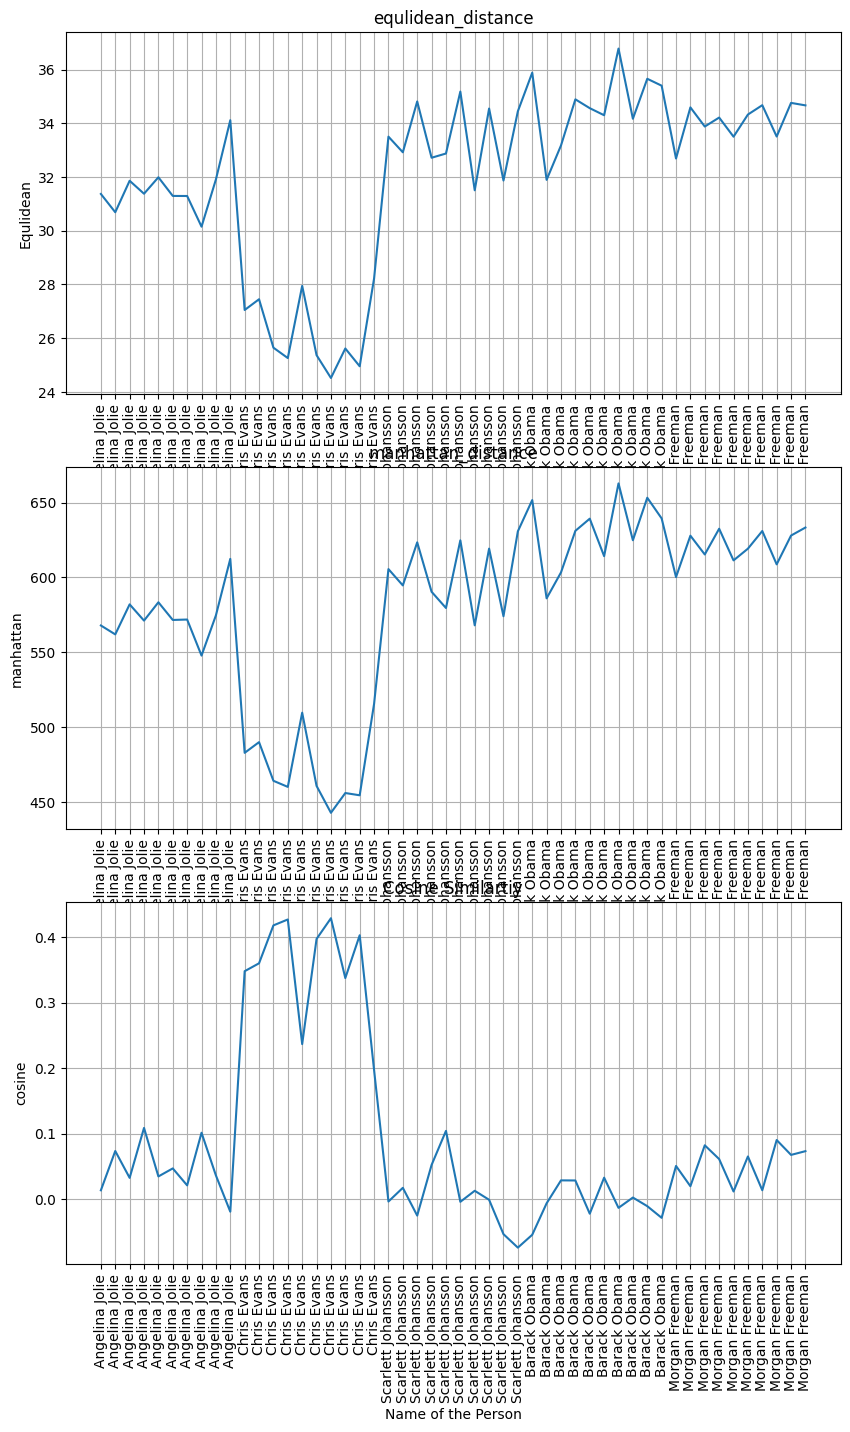

In [20]:
plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
plt.plot(data_search['equlidean'])
plt.xticks(ticks=list(range(len(data_search['equlidean']))),
            labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('Equlidean')
plt.title('equlidean_distance')
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan'])
plt.xticks(ticks=list(range(len(data_search['manhattan']))),
            labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('manhattan')
plt.title('manhattan_distance')
plt.grid()


plt.subplot(3,1,3)
plt.plot(data_search['cosine'])
plt.xticks(ticks=list(range(len(data_search['cosine']))),
            labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('cosine')
plt.title('Cosine Similartiy')
plt.grid()


In [21]:
## identify person name using equlidean distance

In [22]:
d_eq_optimal = 25 

In [23]:
data_filter = data_search.query(f'equlidean < {d_eq_optimal}')
data_filter.reset_index(drop=True,inplace=True)

if len(data_filter) > 0:
    argmin = data_filter['equlidean'].argmin()
    name , role = data_filter.loc[argmin][['Name','Role']]

else:
    name = 'Unknown'
    role = 'Unknown'

In [24]:
print(name , role)

Chris Evans Student


In [25]:
data_filter

,Name,Role,Facial Features,equlidean,manhattan,cosine
0,Chris Evans,Student,"[1.3115608, -2.090772, -1.0405229, -1.7980812,...",24.515728,442.730632,0.428683
1,Chris Evans,Student,"[0.59088683, -1.4150559, -0.6726382, -1.310897...",24.951426,454.433228,0.402697


### Identify the Person using Cosine Similarity

In [26]:
s_opt = 0.4

In [27]:
data_filter = data_search.query(f'cosine > {s_opt}')
data_filter.reset_index(drop=True,inplace=True)

if len(data_filter) > 0:
    argmax = data_filter['cosine'].argmax()
    name_cosine , role_cosine = data_filter.loc[argmax][['Name','Role']]

else:
    name_cosine = 'Unknown'
    role_cosine = 'Unknown'

In [28]:
print(name_cosine,role_cosine)

Chris Evans Student


###Identify Multiple Person in an image

In [29]:
def ml_search_algorithm(dataframe,feature_column,test_vector,name_role=['Name','role'],thresh=0.5):
    ### cosine similarity base search algorithm 

    ## step 1 - take the dataframe (collection of data)
    dataframe = dataframe.copy()

    ##step 2 - index face embedding from the dataframe and convert into array
    X_list = dataframe[feature_column].tolist()
    x = np.asarray(X_list)

    ## step 3 - cal. cosine similarity
    similar = pairwise.cosine_similarity(x,test_vector.reshape(1,-1))
    similar_arr = np.array(similar).flatten()
    dataframe['cosine'] = similar_arr

    ##step 4 -  filter the data
    data_filter = dataframe.query(f'cosine >= {thresh}')
    if len(data_filter) > 0:
        ##step 5 - get the person name
        data_filter.reset_index(drop=True,inplace=True)
        argmax = data_filter['cosine'].argmax()
        person_name , person_role = data_filter.loc[argmax][name_role]

    else:
        person_name = 'Unknown'
        person_role = 'Unknown'

    return person_name,person_role    


In [30]:
test_image = cv2.imread('test_images/test_image11.jpeg')
cv2.imshow('test_image',test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
##step 1 : take the test image and apply to insightface
results = faceapp.get(test_image)
test_copy = test_image.copy()

##step2 : use for loop and extract each embedding and pass to ml_search algorithm
for res in results:
    x1,y1,x2,y2 = res['bbox'].astype(int)
    embeddings = res['embedding']
    person_name , person_role = ml_search_algorithm(dataframe,'Facial Features',test_vector=embeddings,name_role=['Name','Role'],thresh=0.5)

    if person_name == "Unknown":
        color = (0,0,255)
    else:
        color = (0,255,0)
    
    cv2.rectangle(test_copy,(x1,y1),(x2,y2),color)
    text_gen = person_name
    cv2.putText(test_copy,text_gen,(x1,y1),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,1)

cv2.imshow('test_image',test_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()
    

In [32]:
dataframe.head()

,Name,Role,Facial Features
0,Angelina Jolie,Student,"[-0.840976, 1.6623008, -0.74578035, -2.1380825..."
1,Angelina Jolie,Student,"[0.09012403, -0.41691077, -0.37650695, 0.42401..."
2,Angelina Jolie,Student,"[0.86389494, 0.32952014, 0.05781859, -1.453824..."
3,Angelina Jolie,Student,"[1.661117, 1.1610861, -0.41079235, -2.6411536,..."
4,Angelina Jolie,Student,"[0.86431384, 0.9437617, 0.4265172, -1.1836909,..."


### Compressing my dataset

In [33]:
dataframe_compress = dataframe.groupby(by=['Name','Role']).mean()
dataframe_compress.reset_index(inplace=True)
dataframe_compress

,Name,Role,Facial Features
0,Angelina Jolie,Student,"[0.43242025, 1.0748498, -0.12862365, -1.833291..."
1,Barack Obama,Teacher,"[0.9485809, -0.5584051, 0.094820715, -1.279659..."
2,Chris Evans,Student,"[0.7201714, -1.4684148, -0.7781253, -1.4601073..."
3,Morgan Freeman,Teacher,"[0.48535094, -0.6192554, -0.4069932, 1.0687788..."
4,Scarlett Johansson,Student,"[0.19131956, -0.48843804, -1.690233, 0.4423967..."


### Convert Dataframe into array and save in numpy zip format

In [34]:
xvalues = dataframe_compress.values
xvalues

array([['Angelina Jolie', 'Student',
        array([ 4.32420254e-01,  1.07484984e+00, -1.28623649e-01, -1.83329177e+00,
               -7.27802396e-01, -1.23429465e+00, -2.34313130e-01, -3.72791916e-01,
               -6.96481943e-01, -3.52696538e-01, -1.86347470e-01, -8.56500149e-01,
               -7.25770116e-01,  1.59811723e+00,  1.89706221e-01, -8.70287344e-02,
               -8.61652046e-02,  9.59016308e-02, -4.32294518e-01,  5.76181002e-02,
                1.06183112e-01, -1.08450246e+00, -3.68749082e-01, -3.46378744e-01,
                5.48185408e-01, -3.21397781e-01,  1.65740907e+00,  3.66979212e-01,
                9.40395176e-01,  1.18225420e+00,  4.02732939e-01,  5.15204966e-01,
                2.07558203e+00, -1.63649404e+00, -1.61218047e-01, -9.74149108e-02,
               -7.65306175e-01,  7.55763650e-01, -1.70574987e+00,  2.01980740e-01,
               -1.64433122e+00,  5.47630787e-01,  2.28763938e-01, -3.25343072e-01,
                1.90978810e-01,  3.11371267e-01, -

In [36]:
col_name = dataframe_compress.columns
col_name

Index(['Name', 'Role', 'Facial Features'], dtype='object')

In [38]:
np.savez('dataframe_students_teacher.npz',xvalues,col_name)

In [39]:
#load the numpy zip
file_np = np.load('dataframe_students_teacher.npz',allow_pickle=True)
file_np.files

['arr_0', 'arr_1']

In [42]:
pd.DataFrame(file_np['arr_0'],columns=file_np['arr_1'])

,Name,Role,Facial Features
0,Angelina Jolie,Student,"[0.43242025, 1.0748498, -0.12862365, -1.833291..."
1,Barack Obama,Teacher,"[0.9485809, -0.5584051, 0.094820715, -1.279659..."
2,Chris Evans,Student,"[0.7201714, -1.4684148, -0.7781253, -1.4601073..."
3,Morgan Freeman,Teacher,"[0.48535094, -0.6192554, -0.4069932, 1.0687788..."
4,Scarlett Johansson,Student,"[0.19131956, -0.48843804, -1.690233, 0.4423967..."
